In [16]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [17]:
data = pd.read_csv('loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [19]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["person_gender"] = ord_enc.fit_transform(data[["person_gender"]]).astype('int')
data["person_education"] = ord_enc.fit_transform(data[["person_education"]]).astype('int')
data["person_home_ownership"] = ord_enc.fit_transform(data[["person_home_ownership"]]).astype('int')
data["loan_intent"] = ord_enc.fit_transform(data[["loan_intent"]]).astype('int')
data["previous_loan_defaults_on_file"] = ord_enc.fit_transform(data[["previous_loan_defaults_on_file"]]).astype('int')

In [20]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [21]:
data.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.017528,-0.014649,0.193698,0.954412,-0.039008,0.050750,0.032005,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,0.017528,1.000000,-0.002267,0.010173,0.015078,-0.001172,0.010647,-0.003107,0.003662,-0.000367,0.011999,-0.000223,0.000704,-0.000561
person_education,-0.014649,-0.002267,1.000000,0.000331,-0.012034,-0.000290,-0.002441,0.004356,0.000336,-0.006984,-0.014576,0.012498,-0.002669,-0.001747
person_income,0.193698,0.010173,0.000331,1.000000,0.185987,-0.219870,0.242290,0.008639,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,0.015078,-0.012034,0.185987,1.000000,-0.035884,0.044589,0.031230,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
person_home_ownership,-0.039008,-0.001172,-0.000290,-0.219870,-0.035884,1.000000,-0.150243,0.001828,0.130437,0.148933,-0.029549,-0.006421,-0.125974,0.233842
loan_amnt,0.050750,0.010647,-0.002441,0.242290,0.044589,-0.150243,1.000000,-0.001068,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_intent,0.032005,-0.003107,0.004356,0.008639,0.031230,0.001828,-0.001068,1.000000,-0.005372,0.003269,0.030912,0.016244,0.038469,-0.072158
loan_int_rate,0.013402,0.003662,0.000336,0.001510,0.016631,0.130437,0.146093,-0.005372,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,-0.000367,-0.006984,-0.234177,-0.039862,0.148933,0.593011,0.003269,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880


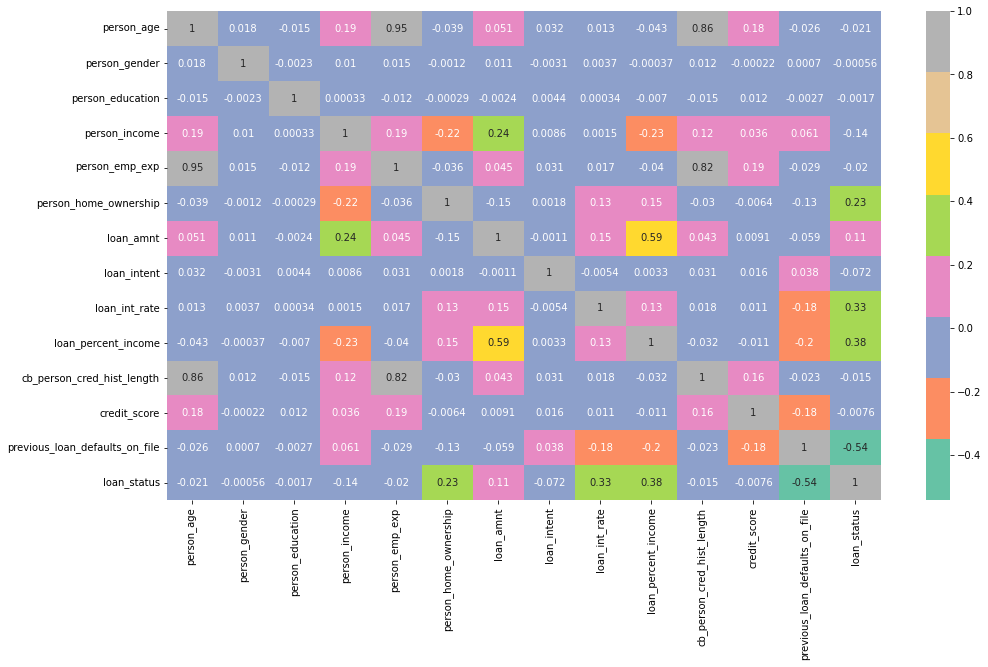

In [22]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [23]:
data = data.drop(['person_gender','person_education'],axis=1)
data

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [24]:
Y = data['loan_status']
X = data.drop(['loan_status'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [25]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [26]:
Y_pred = svc.predict(X_test)

In [27]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) 
svc_accuracy

79.64

In [28]:
#train aucc
Y_train_pred = svc.predict(X_train)
svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 2)*100 
svc_accuracy

80.0

In [14]:
# Logistics

In [29]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)
lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


83.63000000000001

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

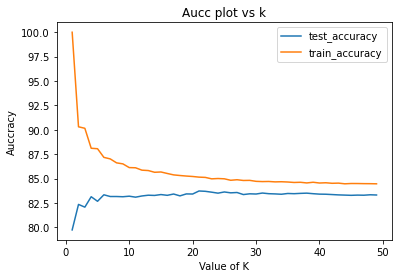

In [33]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y, label = "test_accuracy")
plt.plot(x,y1, label = "train_accuracy")
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

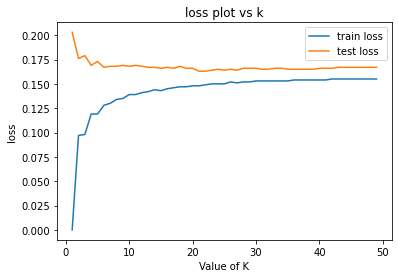

In [34]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
KNN = KNeighborsClassifier(n_neighbors=27)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

83.578
